In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, rmsprop
from keras.utils.np_utils import to_categorical
import cv2
import sys
import os

Using TensorFlow backend.


In [2]:
train_dir = "Level 3/train"
test_dir = "Level 3/test"
categories = ["guide","regulatory","warning"]

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])        

In [5]:
create_trainval_data()

In [6]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        

In [7]:
create_test_data()

In [8]:
import random
random.seed(42)
random.shuffle(trainval_data)

In [9]:
X = []
y = []

X_test = []
y_test = []

In [10]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)

In [11]:
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [12]:
len(X_test)

25

In [13]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(226, 64, 64, 3)
(226,)
(25, 64, 64, 3)
(25,)


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [16]:
y_valid.shape

(46,)

In [17]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [18]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)

In [19]:
test_datagen.fit(X_train)

In [20]:
y_train_categorical = to_categorical(y_train, 3)
y_valid_categorical = to_categorical(y_valid, 3)
y_test_categorical = to_categorical(y_test, 3)

In [21]:
y_train.shape

(180,)

In [22]:
y_valid_categorical.shape

(46, 3)

In [23]:
channels = 3
train_img_size = len(X_train)
batch_size = 64
validation_img_size = len(X_valid)

In [24]:
X_train.shape

(180, 64, 64, 3)

In [25]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.375))
model.add(Dense(3))
model.add(Activation('softmax'))
          
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adadelta', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
activation_1 (Activation)    (None, 64)               

In [26]:
history = model.fit(train_datagen.flow(X_train, y_train_categorical),
                              validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
                                                                      epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 112ms/step - loss: 1.5180 - accuracy: 0.3778 - val_loss: 1.0582 - val_accuracy: 0.4348
Epoch 2/50
6/6 [==============================] - 1s 99ms/step - loss: 1.0250 - accuracy: 0.4111 - val_loss: 0.9761 - val_accuracy: 0.4348
Epoch 3/50
6/6 [==============================] - 1s 89ms/step - loss: 0.8541 - accuracy: 0.6111 - val_loss: 1.7848 - val_accuracy: 0.5435
Epoch 4/50
6/6 [==============================] - 1s 101ms/step - loss: 0.9170 - accuracy: 0.5389 - val_loss: 1.0186 - val_accuracy: 0.4348
Epoch 5/50
6/6 [==============================] - 1s 99ms/step - loss: 0.8577 - accuracy: 0.5833 - val_loss: 0.8112 - val_accuracy: 0.4783
Epoch 6/50
6/6 [==============================] - 1s 97ms/step - loss: 0.8463 - accuracy: 0.6333 - val_loss: 0.5770 - val_accuracy: 0.6304
Epoch 7/50
6/6 [==============================] - 1s 98ms/step - loss: 0.6999 - accuracy: 0.7056 - val_loss: 2.5155 - val_accuracy: 0.4130
Epoch 8/50
6/6 [=========

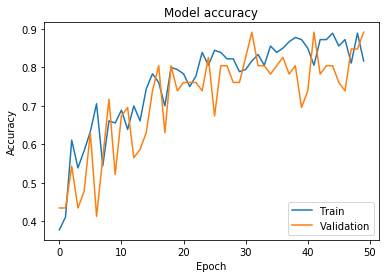

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [28]:
model.save('decentmodel1.h5')

In [29]:
score = model.evaluate(X_test, y_test_categorical)

25/25 [==============================] - 0s 401us/step


In [30]:
score

[0.28205084800720215, 0.9599999785423279]

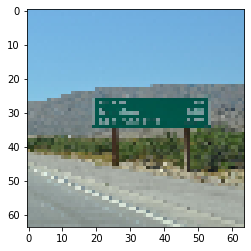

In [31]:
plt.imshow(X_test[6])

In [32]:
for i in range(len(X_test)):
    print('Predicted Sign' + str
         (model.predict_classes(X_test[i].reshape(1,64,64,3))))

Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]


In [33]:
y_pred = model.predict(X_test)

In [34]:
results_class = np.argmax(y_pred, axis=1, out=None)

In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(results_class, y_test))

[[10  1  0]
 [ 0  9  0]
 [ 0  0  5]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         5

    accuracy                           0.96        25
   macro avg       0.97      0.97      0.97        25
weighted avg       0.96      0.96      0.96        25



The random image label is  8


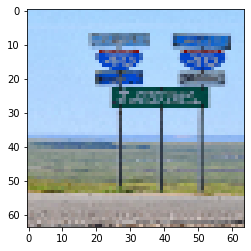

Predicted Sign[0]


In [39]:
random_img = random.randint(0,74)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))